In [73]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
#pima = pd.read_csv("C:/Users/Anita Jadhav/Desktop/jupyter programs/diabetes.csv")

In [74]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("C:/Users/Anita Jadhav/Desktop/jupyter programs/diabetes.csv",header=None, names=col_names)


In [48]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [49]:
pima.tail()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1
768,1,93,70,31,0,30.4,0.315,23,0


In [50]:
pima.shape

(769, 9)

In [51]:
pima.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,769,769,769,769,769,769,769,769,769
unique,18,137,48,52,187,249,518,53,3
top,1,100,70,0,0,32,0.254,22,0
freq,135,17,57,227,374,13,6,72,500


In [52]:
pima.pregnant.isnull().sum()

np.int64(0)

769 769


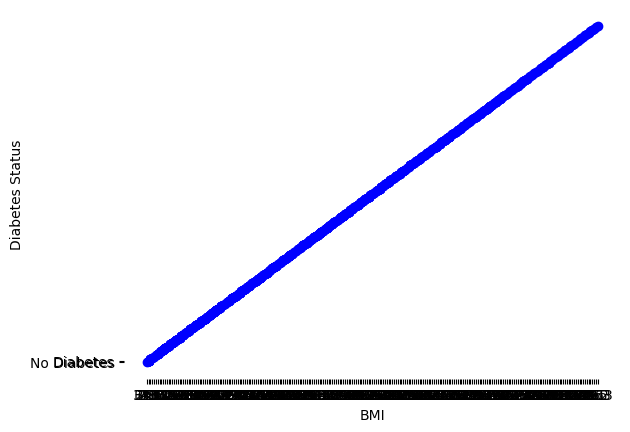

In [107]:
import matplotlib.pyplot as plt

# Make sure y is defined correctly
y = pima['bmi']  # or another column of same length

# Check lengths
print(len(pima['bmi']), len(y))

# Plot
plt.scatter(pima['bmi'], y, color='blue')
plt.xlabel('BMI')
plt.ylabel('Diabetes Status')
plt.yticks([0, 1], ['No Diabetes', 'Diabetes'])  # Optional labels
plt.box(False)
plt.show()



In [39]:
print(pima.columns)


Index(['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree',
       'age', 'label'],
      dtype='object')


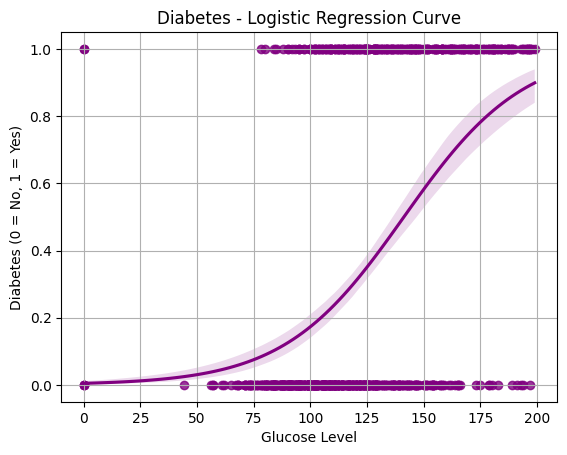

In [56]:


# Rename 'Outcome' to 'label' (if needed)
pima.rename(columns={'Outcome': 'label'}, inplace=True)

# Ensure numeric values in both columns and drop missing values
pima['glucose'] = pd.to_numeric(pima['Glucose'], errors='coerce')  # capital 'G' in original dataset
pima['label'] = pd.to_numeric(pima['label'], errors='coerce')
pima_clean = pima.dropna(subset=['glucose', 'label'])

# Plot logistic regression curve
sns.regplot(x='glucose', y='label', data=pima_clean, logistic=True, color='purple')
plt.title('Diabetes - Logistic Regression Curve')
plt.xlabel('Glucose Level')
plt.ylabel('Diabetes (0 = No, 1 = Yes)')
plt.grid(True)
plt.show()



In [7]:
pima.isnull().sum()

pregnant    0
glucose     1
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       1
dtype: int64

In [77]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [78]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [80]:
import pandas as pd

# Skip the first row (index row that was misread as data)
diabetes = pd.read_csv("C:/Users/Anita Jadhav/Desktop/jupyter programs/diabetes.csv", skiprows=1)

# Rename columns if needed
diabetes.columns = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

In [84]:
import numpy as np

In [85]:
conf_matrix = np.array([[115, 8],
                        [30,  39]])

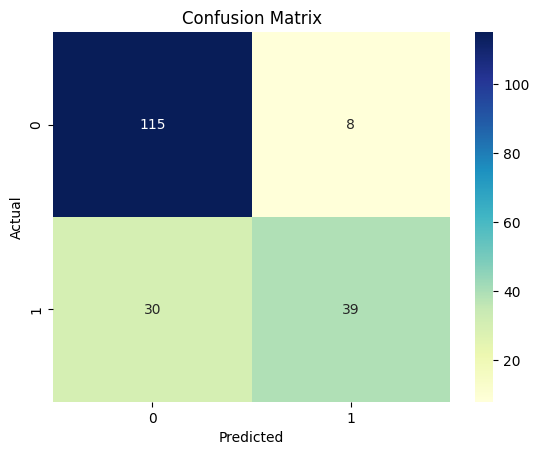

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [93]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Sample dataset load (replace with actual diabetes dataset)
diabetes = pd.read_csv('diabetes.csv')

# Features and target
X = diabetes[['Glucose', 'BMI', 'Age']]
y = diabetes['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Now this will work
manual_input = pd.DataFrame([{
    'Glucose': 100,
    'BMI': 30.0,
    'Age': 45
}])

# Predict
prediction = model.predict(manual_input)

# Output
print(f"Predicted Outcome (0 = No Diabetes, 1 = Diabetes): {prediction[0]}")

Predicted Outcome (0 = No Diabetes, 1 = Diabetes): 0


In [97]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.75


In [95]:
from sklearn.metrics import precision_score

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

Precision: 0.65


In [98]:
from sklearn.metrics import recall_score

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

Recall: 0.64


In [99]:
from sklearn.metrics import confusion_matrix

# First, get predictions
y_pred = model.predict(X_test)

# Get confusion matrix: [[TN, FP], [FN, TP]]
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.2f}")

Specificity: 0.81


In [102]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions
y_pred = model.predict(X_test)
print(f"F1 Score:  {f1_score(y_test, y_pred):.2f}")

F1 Score:  0.64
